# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The goal of this challenge is to examine a set of job postings containing information about te company, degree, major, yearsof experince, distance from metropolis, along with associated salaries and then predict salaries for a new set of job postings.

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#your info here
__author__ = "Ankit Zutshi"
__email__ = "ankitz.citm@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
sal_train_features = pd.read_csv('train_features.csv')
sal_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [3]:
sal_train_target = pd.read_csv('train_salaries.csv')
sal_train_target.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [4]:
sal_test_features = pd.read_csv('test_features.csv')
sal_test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [5]:
sal_train_features.info(), sal_train_target.info(), sal_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000

(None, None, None)

In [6]:
sal_train_features.columns

Index([u'jobId', u'companyId', u'jobType', u'degree', u'major', u'industry',
       u'yearsExperience', u'milesFromMetropolis'],
      dtype='object')

### ---- 3 Clean the data ----

In [7]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

# Duplicates check
sal_train_features.duplicated().sum()

0

In [8]:
sal_test_features.duplicated().sum()

0

In [10]:
numerical_cols = ['yearsExperience', 'milesFromMetropolis']

In [11]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

### ---- 4 Explore the data (EDA) ----

In [12]:
#summarize each feature variable

#summarize the target variable

#look for correlation between each feature and the target

#look for correlation between features

In [13]:
sal_train_features.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [14]:
sal_train_features.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685306512,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


# Merge features and targets into single df (optional: delete original dfs)

In [15]:
# Merge the features and salaries on jobId, delete original file to save memory
train_df = pd.merge(sal_train_features, sal_train_target, on='jobId')

In [16]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [17]:
del sal_train_features, sal_train_target, sal_test_features

# Visualize the data

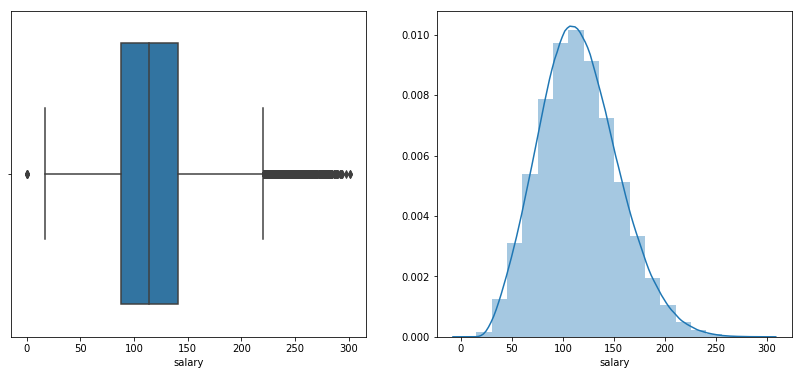

In [18]:
# Visualize the target variable 
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

# Use IQR rule to identify potential outliers

In [19]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


# Examine potential outiers

In [20]:
#check potential outlier below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [21]:
#check potential outlier above upper bound
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [22]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


These entries with zero salary do not appear to be volunteer positions. We are confident that they are instances of missing/corrupt data and should be removed from the training set.

The high-salary potential outliers all appear to be legitimate data. Most roles are C-level executive roles and the junior positions are in industries that are well known for high salaries (oil, finance). We determine these entries to be legitimate and will not remove them.

In [23]:
#Remove 0 salary data 
train_df = train_df[train_df.salary > 8.5]

In [24]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

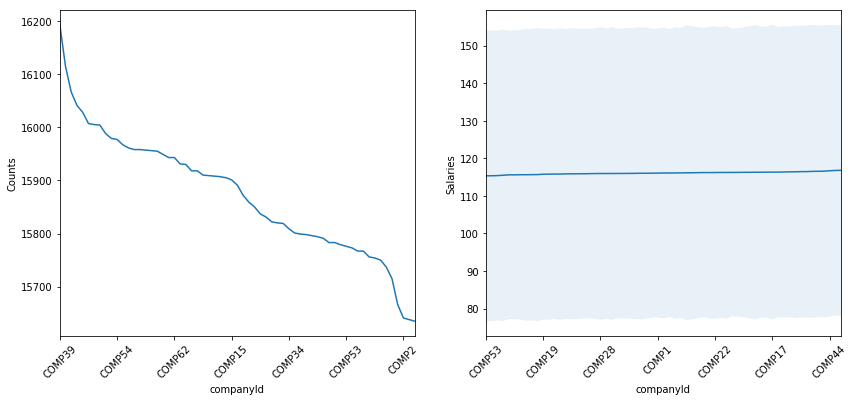

In [25]:
plot_feature(train_df, 'companyId')

The salary is weakly associated with companies.

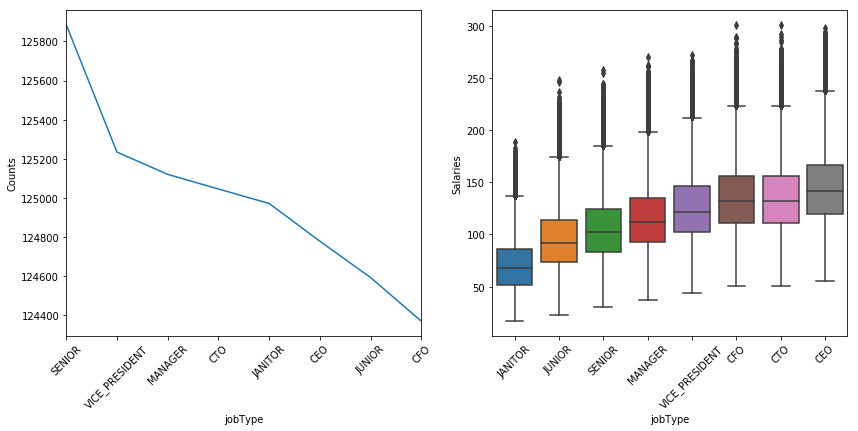

In [26]:
plot_feature(train_df, 'jobType')

There is a clear positive correlation between job type and salary.

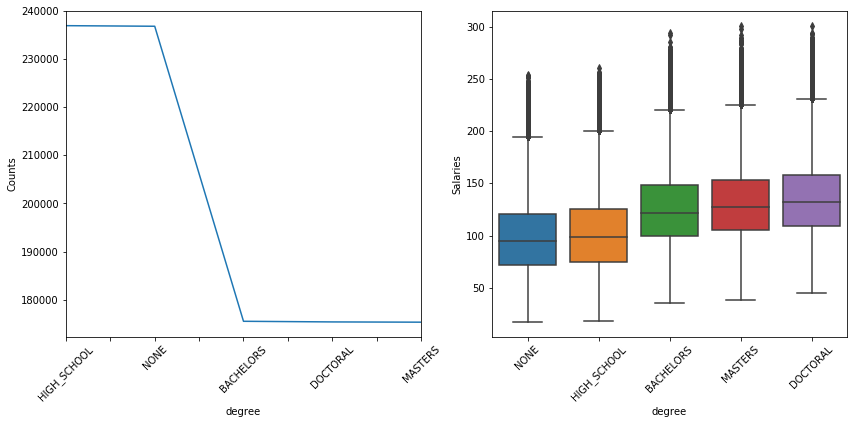

In [27]:
plot_feature(train_df, 'degree')

More advanced degrees tend to correspond to higher salaries.

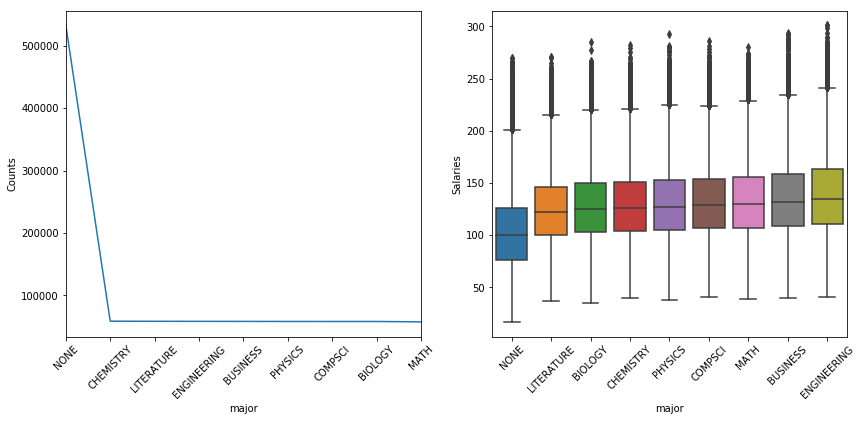

In [28]:
plot_feature(train_df, 'major')

People with majors of engineering, business and math generally have higher salaries.


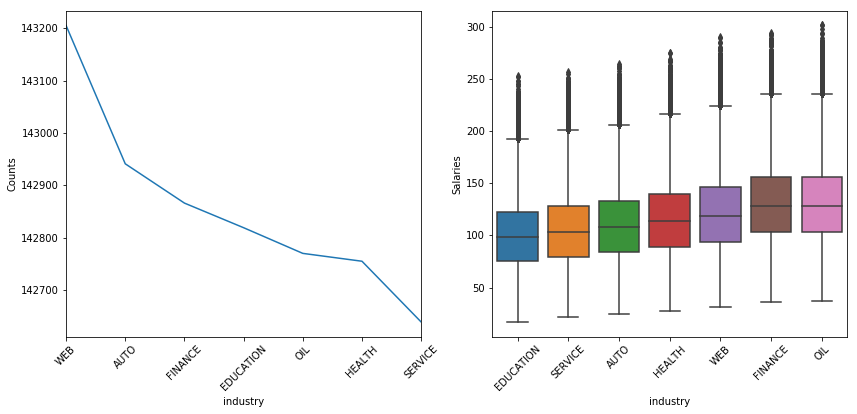

In [29]:
plot_feature(train_df, 'industry')

As for industries, oil, finance and web industries generally pay better.

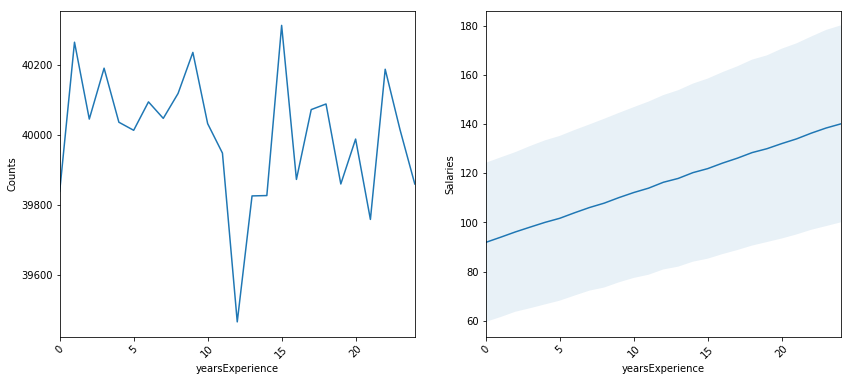

In [30]:
plot_feature(train_df, 'yearsExperience')

In general, there is a clear positive correlation between salary and years of experience.

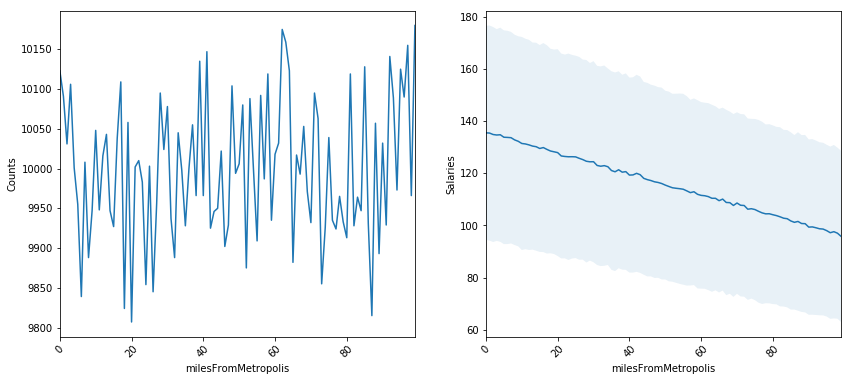

In [31]:
plot_feature(train_df, 'milesFromMetropolis')

In general, salaries decrease with the distance to metropolis.

In [32]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Feature Engineering

Do label encoding by replacing categorical column values with average salary to identify linear and non-linear relationship among variables 

In [33]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)


In [34]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

In [35]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


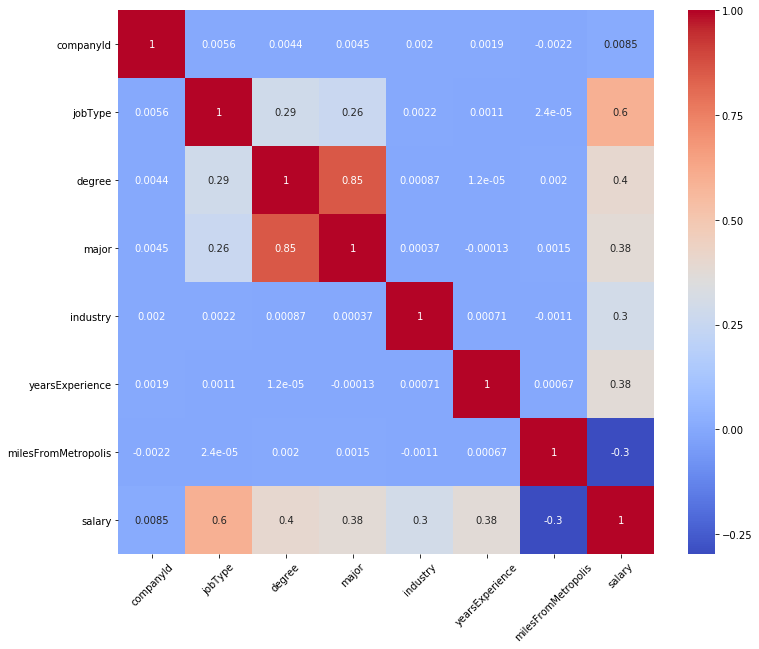

In [36]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

We see that jobType is most strongly correlated with salary, followed by degree, major, and yearsExperience.

Among the features, we see that degree and major have a strong degree of correlation and jobType has a moderate degree of correlation with both degree and major.

In [37]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


### ---- 5 Establish a baseline ----

In [38]:
#define number of processors to use for parallel runs
num_procs = 4

#set verbose level for models
verbose_lvl = 0

#define input files
train_feature_file = 'train_features.csv'
train_target_file = 'train_salaries.csv'
test_file = 'test_features.csv'

#define variables
cat_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']
num_cols = ['yearsExperience', 'milesFromMetropolis']
target_col = 'salary'
id_col = 'jobId'

engineer_features = True

In [39]:
feature_df = pd.read_csv(train_feature_file)

In [40]:
target_df = pd.read_csv(train_target_file)

In [41]:
train_df = pd.merge(left=feature_df, right=target_df, how='inner', on=id_col, left_index=False, right_index=False)

In [42]:
test_df = pd.read_csv(test_file)

In [43]:
test_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [44]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


Clean the training data to remove 0 salaries

In [45]:
train_df = train_df[train_df['salary'] > 0] 

Shuffle the data to improve the cross-validation accuracy

In [46]:
train_df = shuffle(train_df).reset_index()

In [47]:
train_df.head()

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,99914,JOB1362684507601,COMP1,JUNIOR,NONE,NONE,FINANCE,22,41,87
1,615297,JOB1362685022984,COMP44,CTO,HIGH_SCHOOL,NONE,EDUCATION,8,91,105
2,583392,JOB1362684991079,COMP39,CEO,DOCTORAL,LITERATURE,SERVICE,14,89,105
3,761155,JOB1362685168842,COMP41,SENIOR,BACHELORS,NONE,SERVICE,3,94,52
4,561210,JOB1362684968897,COMP61,CTO,BACHELORS,BIOLOGY,WEB,3,35,135


Apply label encoding for using the categorical data by fitting and transformation to both training and test datasets

In [48]:
def label_encoder(df): 
    le = LabelEncoder()
    for col in cat_cols:
        le.fit(df[col])
        df[col] = le.transform(df[col])
    return df

In [49]:
train_df = label_encoder(train_df)

In [50]:
test_df = label_encoder(test_df)

In [51]:
train_df.head()

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,99914,JOB1362684507601,1,4,4,7,2,22,41,87
1,615297,JOB1362685022984,39,2,2,7,1,8,91,105
2,583392,JOB1362684991079,33,0,1,5,5,14,89,105
3,761155,JOB1362685168842,36,6,0,7,5,3,94,52
4,561210,JOB1362684968897,58,2,0,0,6,3,35,135


In [52]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

#brainstorm 3 models that you think may improve results over the baseline model based
#on your own 

Since our EDA and feature engineering shows both linear and non-linear relationships amount the variables, the 3 models of choice are :
    1. Linear Regression
    2. RandomForest
    3. GradientBoost

### ---- 7 Engineer features  ----

Engineer new features (grouping statistics) to see whether they would be important in improving the model mse

In [53]:
def get_group_stats(df):
    '''calculates group statistics'''
    groups = df.groupby(cat_cols)
    group_stats_df = pd.DataFrame({'group_mean': groups[target_col].mean()})
    group_stats_df['group_max'] = groups[target_col].max()
    group_stats_df['group_min'] = groups[target_col].min()
    group_stats_df['group_std'] = groups[target_col].std()
    group_stats_df['group_median'] = groups[target_col].median()
    return group_stats_df

Adding new features to the model

In [54]:
group_stats_df =get_group_stats(train_df)
group_cols = list(group_stats_df.columns)
group_stats_df.reset_index(inplace=True)

'''merges engineered features with original train and test df'''
train_df = pd.merge(train_df, group_stats_df, on=cat_cols, how='left')
train_df.fillna(0, inplace=True)

test_df = pd.merge(test_df, group_stats_df, on=cat_cols, how='left')
test_df.fillna(0, inplace=True)

In [55]:
train_df.head()

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,group_mean,group_max,group_min,group_std,group_median
0,99914,JOB1362684507601,1,4,4,7,2,22,41,87,93.622951,156,52,24.305804,87.0
1,615297,JOB1362685022984,39,2,2,7,1,8,91,105,113.031250,184,65,30.267573,108.5
2,583392,JOB1362684991079,33,0,1,5,5,14,89,105,127.000000,142,105,16.807736,136.0
3,761155,JOB1362685168842,36,6,0,7,5,3,94,52,88.909091,115,52,21.435739,94.0
4,561210,JOB1362684968897,58,2,0,0,6,3,35,135,112.200000,135,88,20.315019,113.0


In [56]:
test_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,group_mean,group_max,group_min,group_std,group_median
0,JOB1362685407687,27,5,2,7,3,22,73,108.208333,173.0,61.0,26.037582,107.0
1,JOB1362685407688,5,4,4,7,0,20,47,71.482759,129.0,36.0,21.142990,67.5
2,JOB1362685407689,2,2,3,0,3,17,9,157.500000,181.0,144.0,17.291616,152.5
3,JOB1362685407690,14,5,2,7,4,14,96,122.379310,176.0,78.0,21.599080,121.0
4,JOB1362685407691,30,4,1,0,4,10,44,110.333333,155.0,83.0,24.443131,103.5


Define the feature columns for training the model. This would be the numeric, categorical columns and the new engineered group features

In [57]:
feature_cols = cat_cols + num_cols + group_cols 

In [58]:
feature_cols

['companyId',
 'jobType',
 'degree',
 'major',
 'industry',
 'yearsExperience',
 'milesFromMetropolis',
 'group_mean',
 'group_max',
 'group_min',
 'group_std',
 'group_median']

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 8 Create models ----

Creating a modelcontainer class

In [117]:
class ModelContainer:
    def __init__(self, models=[]):#, default_num_iters=10, verbose_lvl=0):
        '''initializes model list and dicts'''
        self.models = models
        self.best_model = None
        self.predictions = None
        self.mean_mse = {}
        #self.default_num_iters = default_num_iters
        #self.verbose_lvl = verbose_lvl
        
    def add_model(self, model):
        self.models.append(model)

    def cross_validate(self, data, k=3, num_procs=1):
        '''cross validate models using given data'''
        feature_df = train_df[feature_cols]
        target_df = train_df[target_col]
        for model in self.models:
            neg_mse = cross_val_score(model, feature_df, target_df, cv=k, n_jobs=num_procs, scoring='neg_mean_squared_error')
            self.mean_mse[model] = -1.0*np.mean(neg_mse)
    
    def select_best_model(self):
        '''select model with lowest mse'''
        self.best_model = min(self.mean_mse, key=self.mean_mse.get)
       
        
    def best_model_fit(self, features, targets):
        '''fits best model'''
        self.best_model.fit(features, targets)
    
    def best_model_predict(self, features):
        '''scores features using best model'''
        self.predictions = self.best_model.predict(features)
        return self.predictions
   
    @staticmethod
    def get_feature_importance(model, cols):
        '''retrieves and sorts feature importances'''
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_importances = pd.DataFrame({'feature':cols, 'importance':importances})
            feature_importances.sort_values(by='importance', ascending=False, inplace=True)
            #set index to 'feature'
            feature_importances.set_index('feature', inplace=True, drop=True)
            return feature_importances
        else:
            #some models don't have feature_importances_
            return "Feature importances do not exist for given model"

    def print_summary(self):
        '''prints summary of models, best model, and feature importance'''
        print('\nModel Summaries:\n')
        for model in models.mean_mse:
            print('\n', model, '- MSE:', models.mean_mse[model])
        print('\nBest Model:\n', models.best_model)
        print('\nMSE of Best Model\n', models.mean_mse[models.best_model])
        print('\nFeature Importances\n', models.get_feature_importance(models.best_model, feature_cols))

        feature_importances = self.get_feature_importance(models.best_model, feature_cols)
        feature_importances.plot.bar()
        plt.show()
        
    def save_results(model, mean_mse, predictions, feature_importances):
        '''saves model, model summary, feature importances, and predictions'''
        with open('model.txt', 'w') as file:
            file.write(str(model))
        feature_importances.to_csv('feature_importances.csv') 
        np.savetxt('predictions.csv', predictions, delimiter=',')

In [118]:
#create and tune the models that you brainstormed during part 2
models = ModelContainer()

#create models -- hyperparameter tuning already done by hand for each model
models.add_model(LinearRegression())
models.add_model(RandomForestRegressor(n_estimators=60, n_jobs=num_procs, max_depth=15, min_samples_split=80, \
                                       max_features=8, verbose=verbose_lvl))
models.add_model(GradientBoostingRegressor(n_estimators=40, max_depth=7, loss='ls', verbose=verbose_lvl))

### ---- 9 Test models ----

In [119]:
#do 5-fold cross validation on models and measure MSE
models.cross_validate(train_df, k=5, num_procs=num_procs)

### ---- 10 Select best model  ----

In [120]:
#select the model with the lowest mean squared error as your "prodcuction" model
model =  models.best_model

In [121]:
mse = models.mean_mse[models.best_model]

In [122]:
models.best_model_fit(train_df[feature_cols], train_df[target_col])
predictions = models.best_model_predict(test_df[feature_cols])

array([ 116.62494094,   91.24165854,  162.12414655, ...,   55.21896698,
        147.83289302,  105.85174938])


Model Summaries:

('\n', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False), '- MSE:', 312.98567290198844)
('\n', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=80, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=4, oob_score=False, random_state=None,
           verbose=0, warm_start=False), '- MSE:', 312.96998646576441)
('\n', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normali

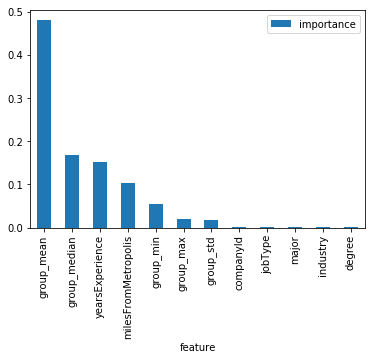

In [123]:
models.print_summary()

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [132]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

#store feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = [0]*len(feature_df.columns)
    


### ---- 12 Deploy solution ----

In [125]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [151]:
feature_importances = pd.DataFrame({'feature':feature_cols, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)



In [152]:
feature_importances

,importance
feature,
group_mean,0.479594
group_median,0.167474
yearsExperience,0.151470
milesFromMetropolis,0.102814
group_min,0.055485
group_max,0.019246
group_std,0.018132
companyId,0.002314
jobType,0.001152


In [141]:
#save results
models.save_results( mse, predictions, feature_importances)